# Project: Creditworthiness Classification Model

### Situation
Loan approval processes often take several days, primarily due to the need for credit bureau inquiries, which also incur significant costs. This delay affects both the efficiency of the lending process and the overall customer experience.

### Goal
Develop a classification model that predicts whether a customer's credit score is "Poor" or not. By implementing this predictive model, we aim to minimize unnecessary credit bureau requests, reducing operational costs while ensuring that resources are allocated to applicants with a higher likelihood of repayment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
credit_df = pd.read_csv("../Data/credit_train_clean.csv").drop(["Name", "SSN", "ID", "Customer_ID"], axis=1)

credit_df.head()

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1  23.0  Scientist       19114.12            1824.843333   
1      2  23.0  Scientist       19114.12            1824.843333   
2      3  23.0  Scientist       19114.12            1824.843333   
3      4  23.0  Scientist       19114.12            1824.843333   
4      5  23.0  Scientist       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.0              4.0            3.0          4.0   
1                3.0              4.0            3.0          4.0   
2                3.0              4.0            3.0          4.0   
3                3.0              4.0            3.0          4.0   
4                3.0              4.0            3.0          4.0   

                                        Type_of_Loan  ...  Credit_Mix  \
0  auto loan,credit-builder loan,personal loan,ho...  ...        Good   
1  auto loan,credit-builder loan,personal loan,ho...  ...        Good   
2  auto loan,credit-builder loan,personal loan,ho...  ...        Good   
3  auto loan,credit-builder loan,personal loan,ho...  ...        Good   
4  auto loan,credit-builder loan,personal loan,ho...  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620               265.0   
1            809.98                 31.944960               266.0   
2            809.98                 28.609352               267.0   
3            809.98                 31.377862               268.0   
4            809.98                 24.797347               269.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   
2                    No            49.574949                 21.46538   
3                    No            49.574949                 21.46538   
4                    No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 24 columns]

In [3]:
credit_df.shape

(100000, 24)

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [5]:
credit_df.describe()

Month            Age  Annual_Income  Monthly_Inhand_Salary  \
count  100000.000000  100000.000000  100000.000000          100000.000000   
mean        4.500000      33.316340   50505.123449            4197.270835   
std         2.291299      10.764812   38299.422093            3186.432497   
min         1.000000      14.000000    7005.930000             303.645417   
25%         2.750000      24.000000   19342.972500            1626.594167   
50%         4.500000      33.000000   36999.705000            3095.905000   
75%         6.250000      42.000000   71683.470000            5957.715000   
max         8.000000      56.000000  179987.280000           15204.633333   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate    Num_of_Loan  \
count      100000.000000    100000.000000   100000.00000  100000.000000   
mean            5.368820         5.533570       14.53208       3.532880   
std             2.593314         2.067098        8.74133       2.446356   
min             0.000000         0.000000        1.00000       0.000000   
25%             3.000000         4.000000        7.00000       2.000000   
50%             5.000000         5.000000       13.00000       3.000000   
75%             7.000000         7.000000       20.00000       5.000000   
max            11.000000        11.000000       34.00000       9.000000   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
count         100000.00000           100000.000000         100000.000000   
mean              21.08141               13.313120             10.470323   
std               14.80456                6.237166              6.609481   
min                0.00000                0.000000              0.500000   
25%               10.00000                9.000000              5.380000   
50%               18.00000               14.000000              9.400000   
75%               28.00000               18.000000             14.850000   
max               62.00000               25.000000             29.980000   

       Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
count         100000.000000     100000.000000             100000.000000   
mean               5.798250       1426.220376                 32.285173   
std                3.867826       1155.129026                  5.116875   
min                0.000000          0.230000                 20.000000   
25%                3.000000        566.072500                 28.052567   
50%                5.000000       1166.155000                 32.305784   
75%                8.000000       1945.962500                 36.496663   
max               17.000000       4998.070000                 50.000000   

       Credit_History_Age  Total_EMI_per_month  Amount_invested_monthly  \
count       100000.000000        100000.000000            100000.000000   
mean           221.220460           107.699208                55.101315   
std             99.680716           132.267056                39.006932   
min              1.000000             0.000000                 0.000000   
25%            144.000000            29.268886                27.959111   
50%            219.000000            66.462304                45.156550   
75%            302.000000           147.392573                71.295797   
max            404.000000          1779.103254               434.191089   

       Monthly_Balance  
count    100000.000000  
mean        392.697586  
std         201.652719  
min           0.007760  
25%         267.615983  
50%         333.865366  
75%         463.215683  
max        1183.930696

In [6]:
credit_df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [7]:
credit_df[credit_df.duplicated()]

Empty DataFrame
Columns: [Month, Age, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 24 columns]

In [8]:
## Creating Target variable

credit_df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [9]:
# Target will be flag Poor
credit_df['Credit_Score']=np.where(credit_df['Credit_Score']=='Poor',1,0)

In [10]:
credit_df.select_dtypes('object').columns

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

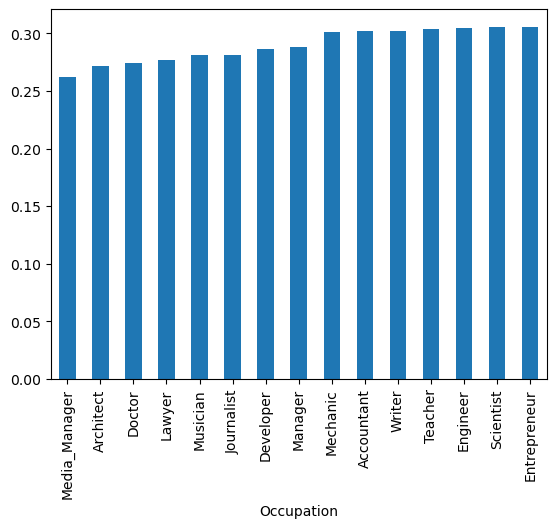

In [11]:
credit_df.groupby('Occupation')['Credit_Score'].mean().sort_values().plot.bar();

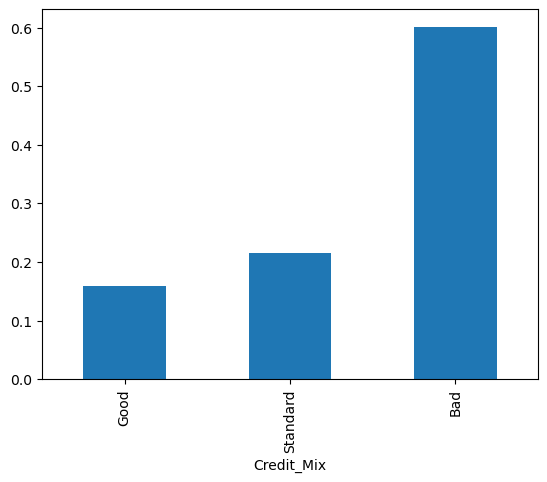

In [12]:
credit_df.groupby('Credit_Mix')['Credit_Score'].mean().sort_values().plot.bar();

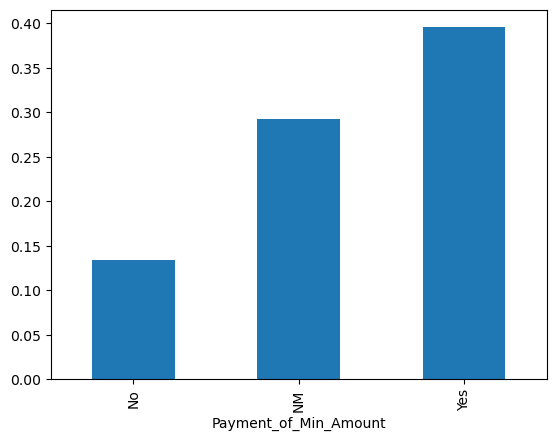

In [13]:
credit_df.groupby('Payment_of_Min_Amount')['Credit_Score'].mean().sort_values().plot.bar();

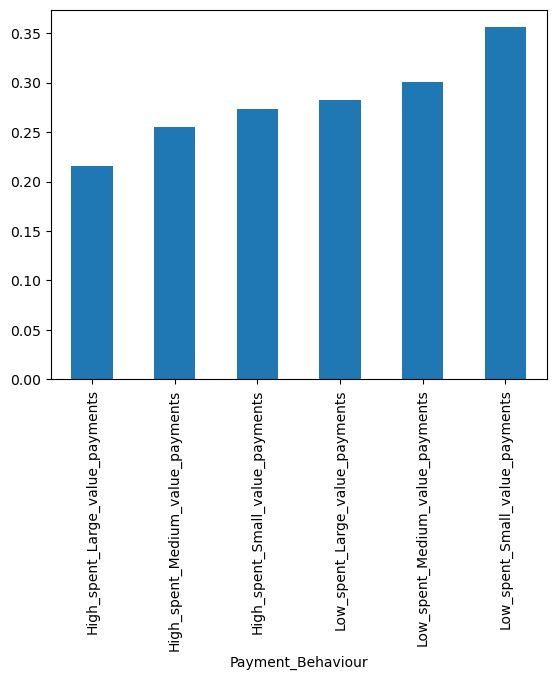

In [14]:
credit_df.groupby('Payment_Behaviour')['Credit_Score'].mean().sort_values().plot.bar();

In [15]:
# Ploting Numeric Data

credit_df.select_dtypes(['int','float']).columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

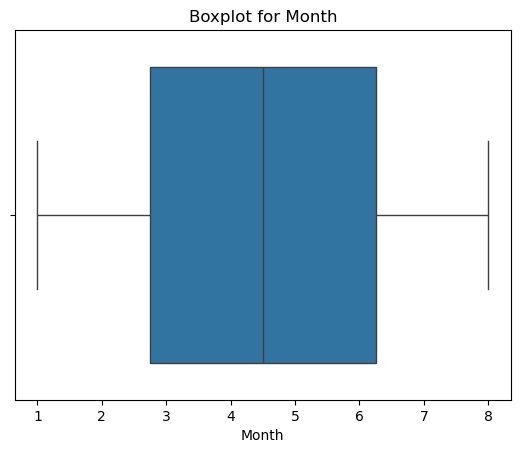

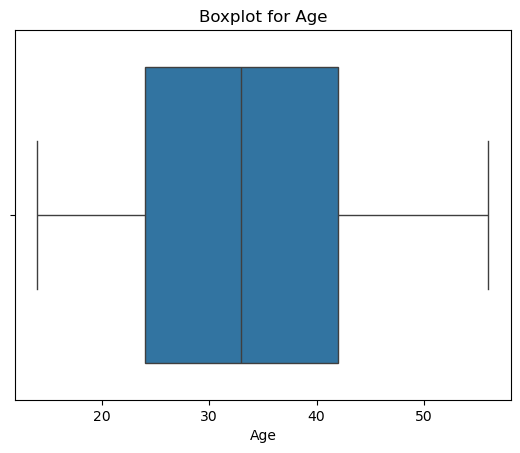

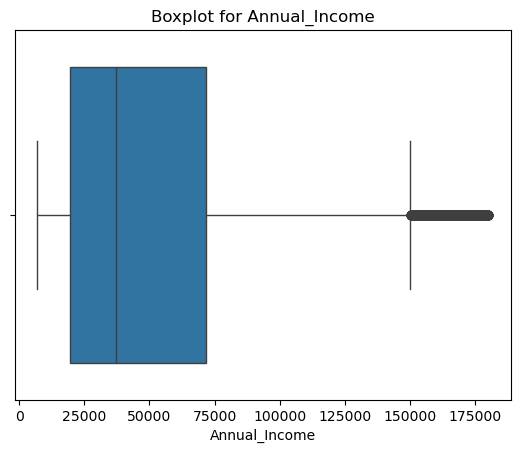

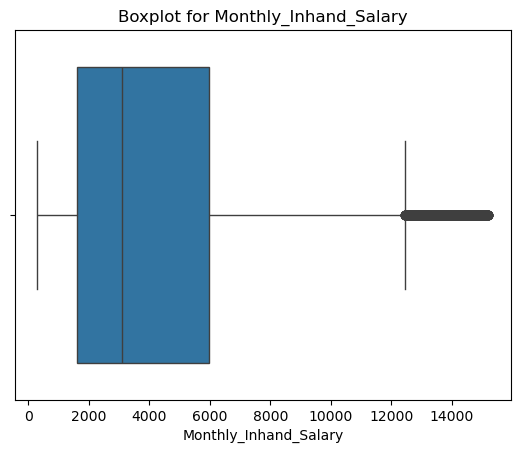

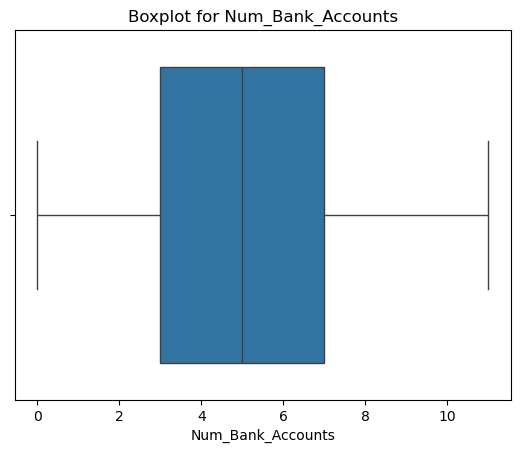

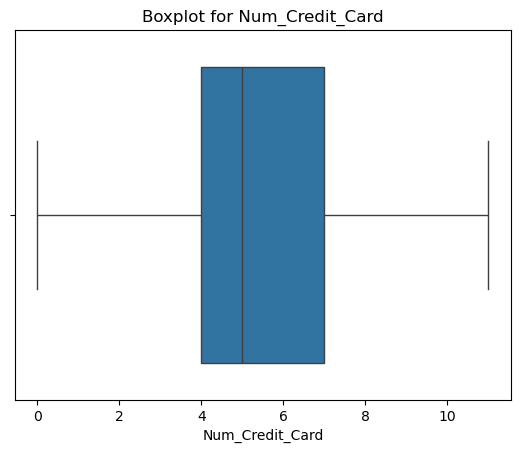

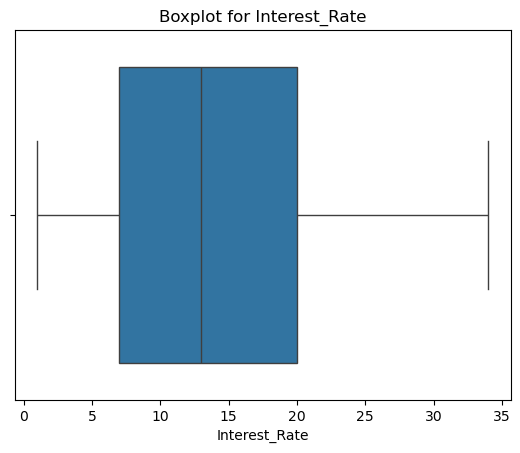

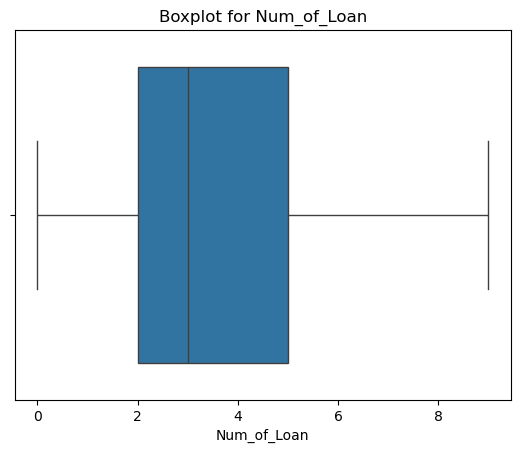

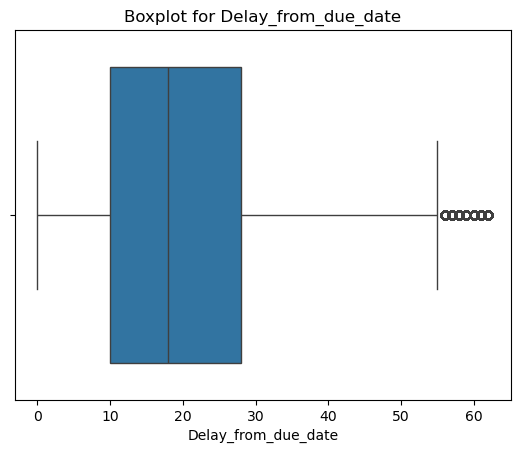

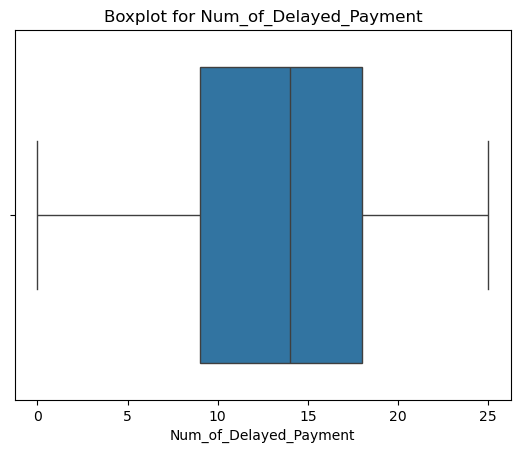

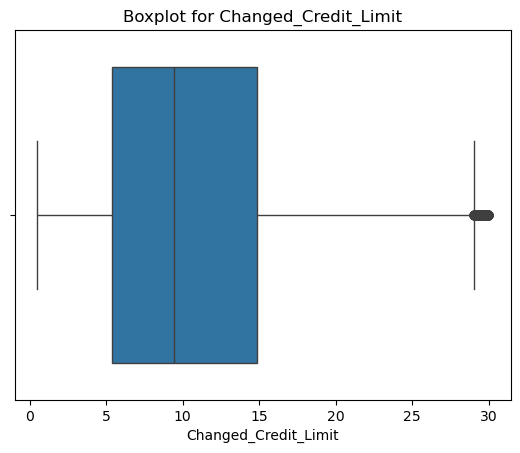

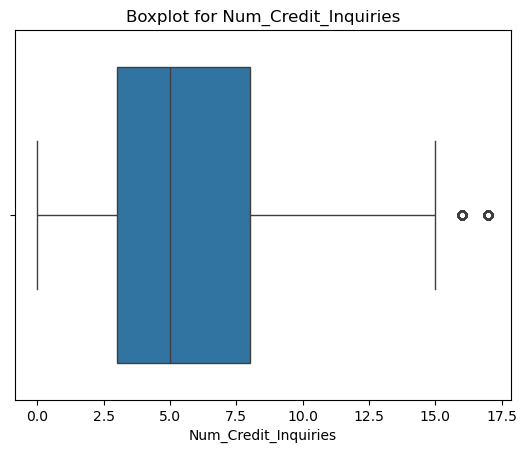

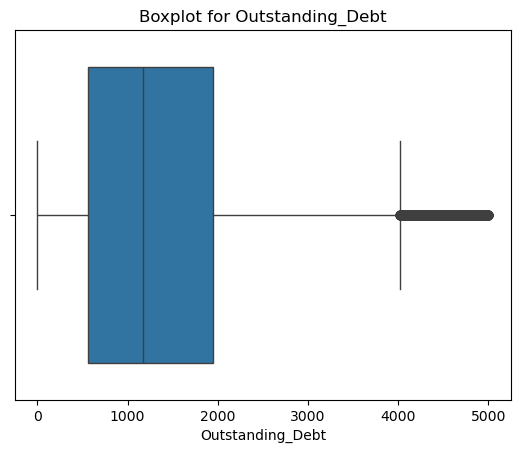

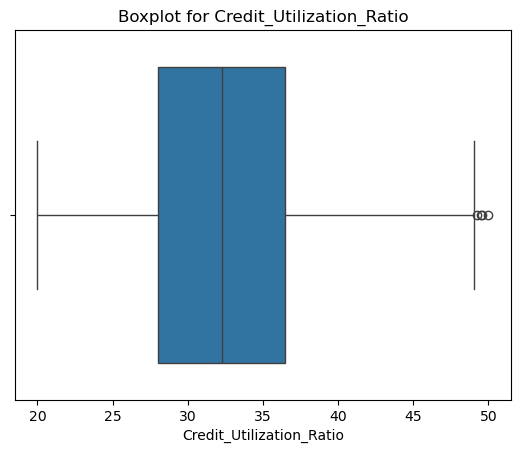

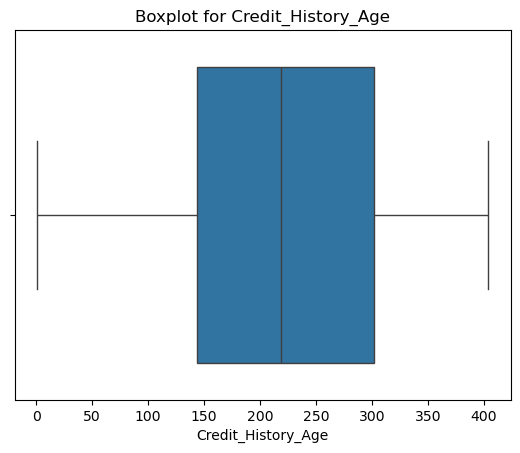

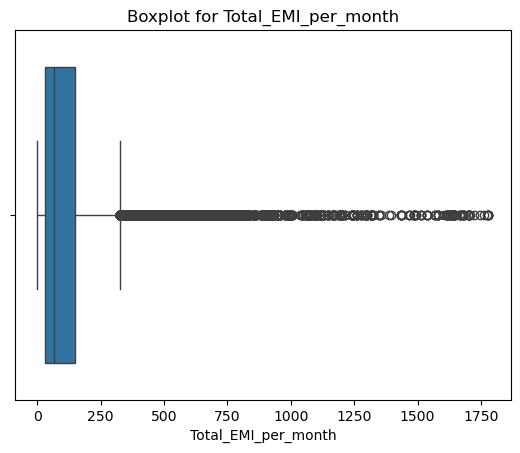

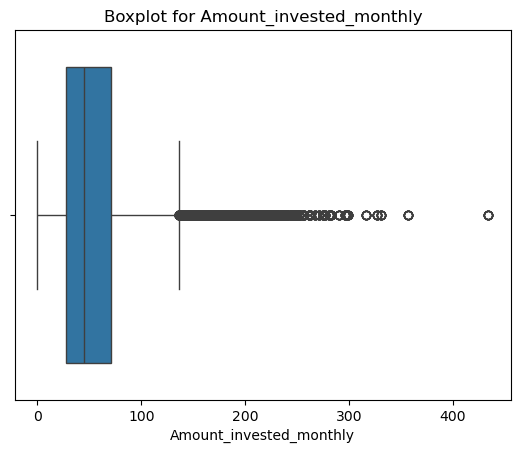

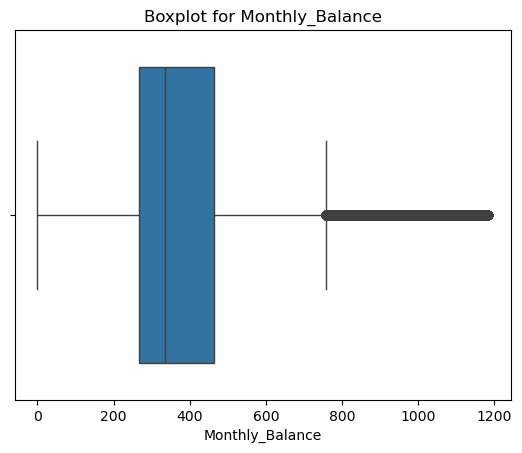

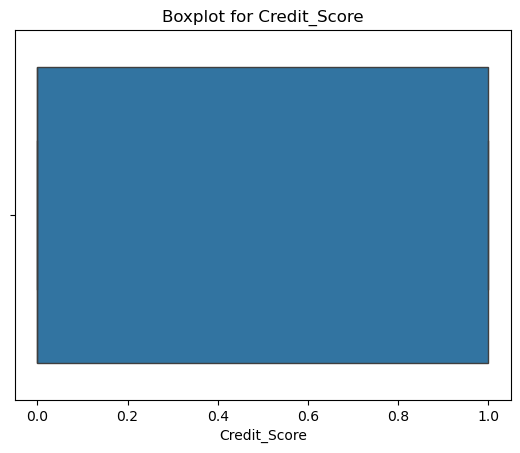

In [16]:
columns = credit_df.select_dtypes(['int', 'float']).columns
for col in columns:
    sns.boxplot(x=credit_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Exploratory Data Analysis

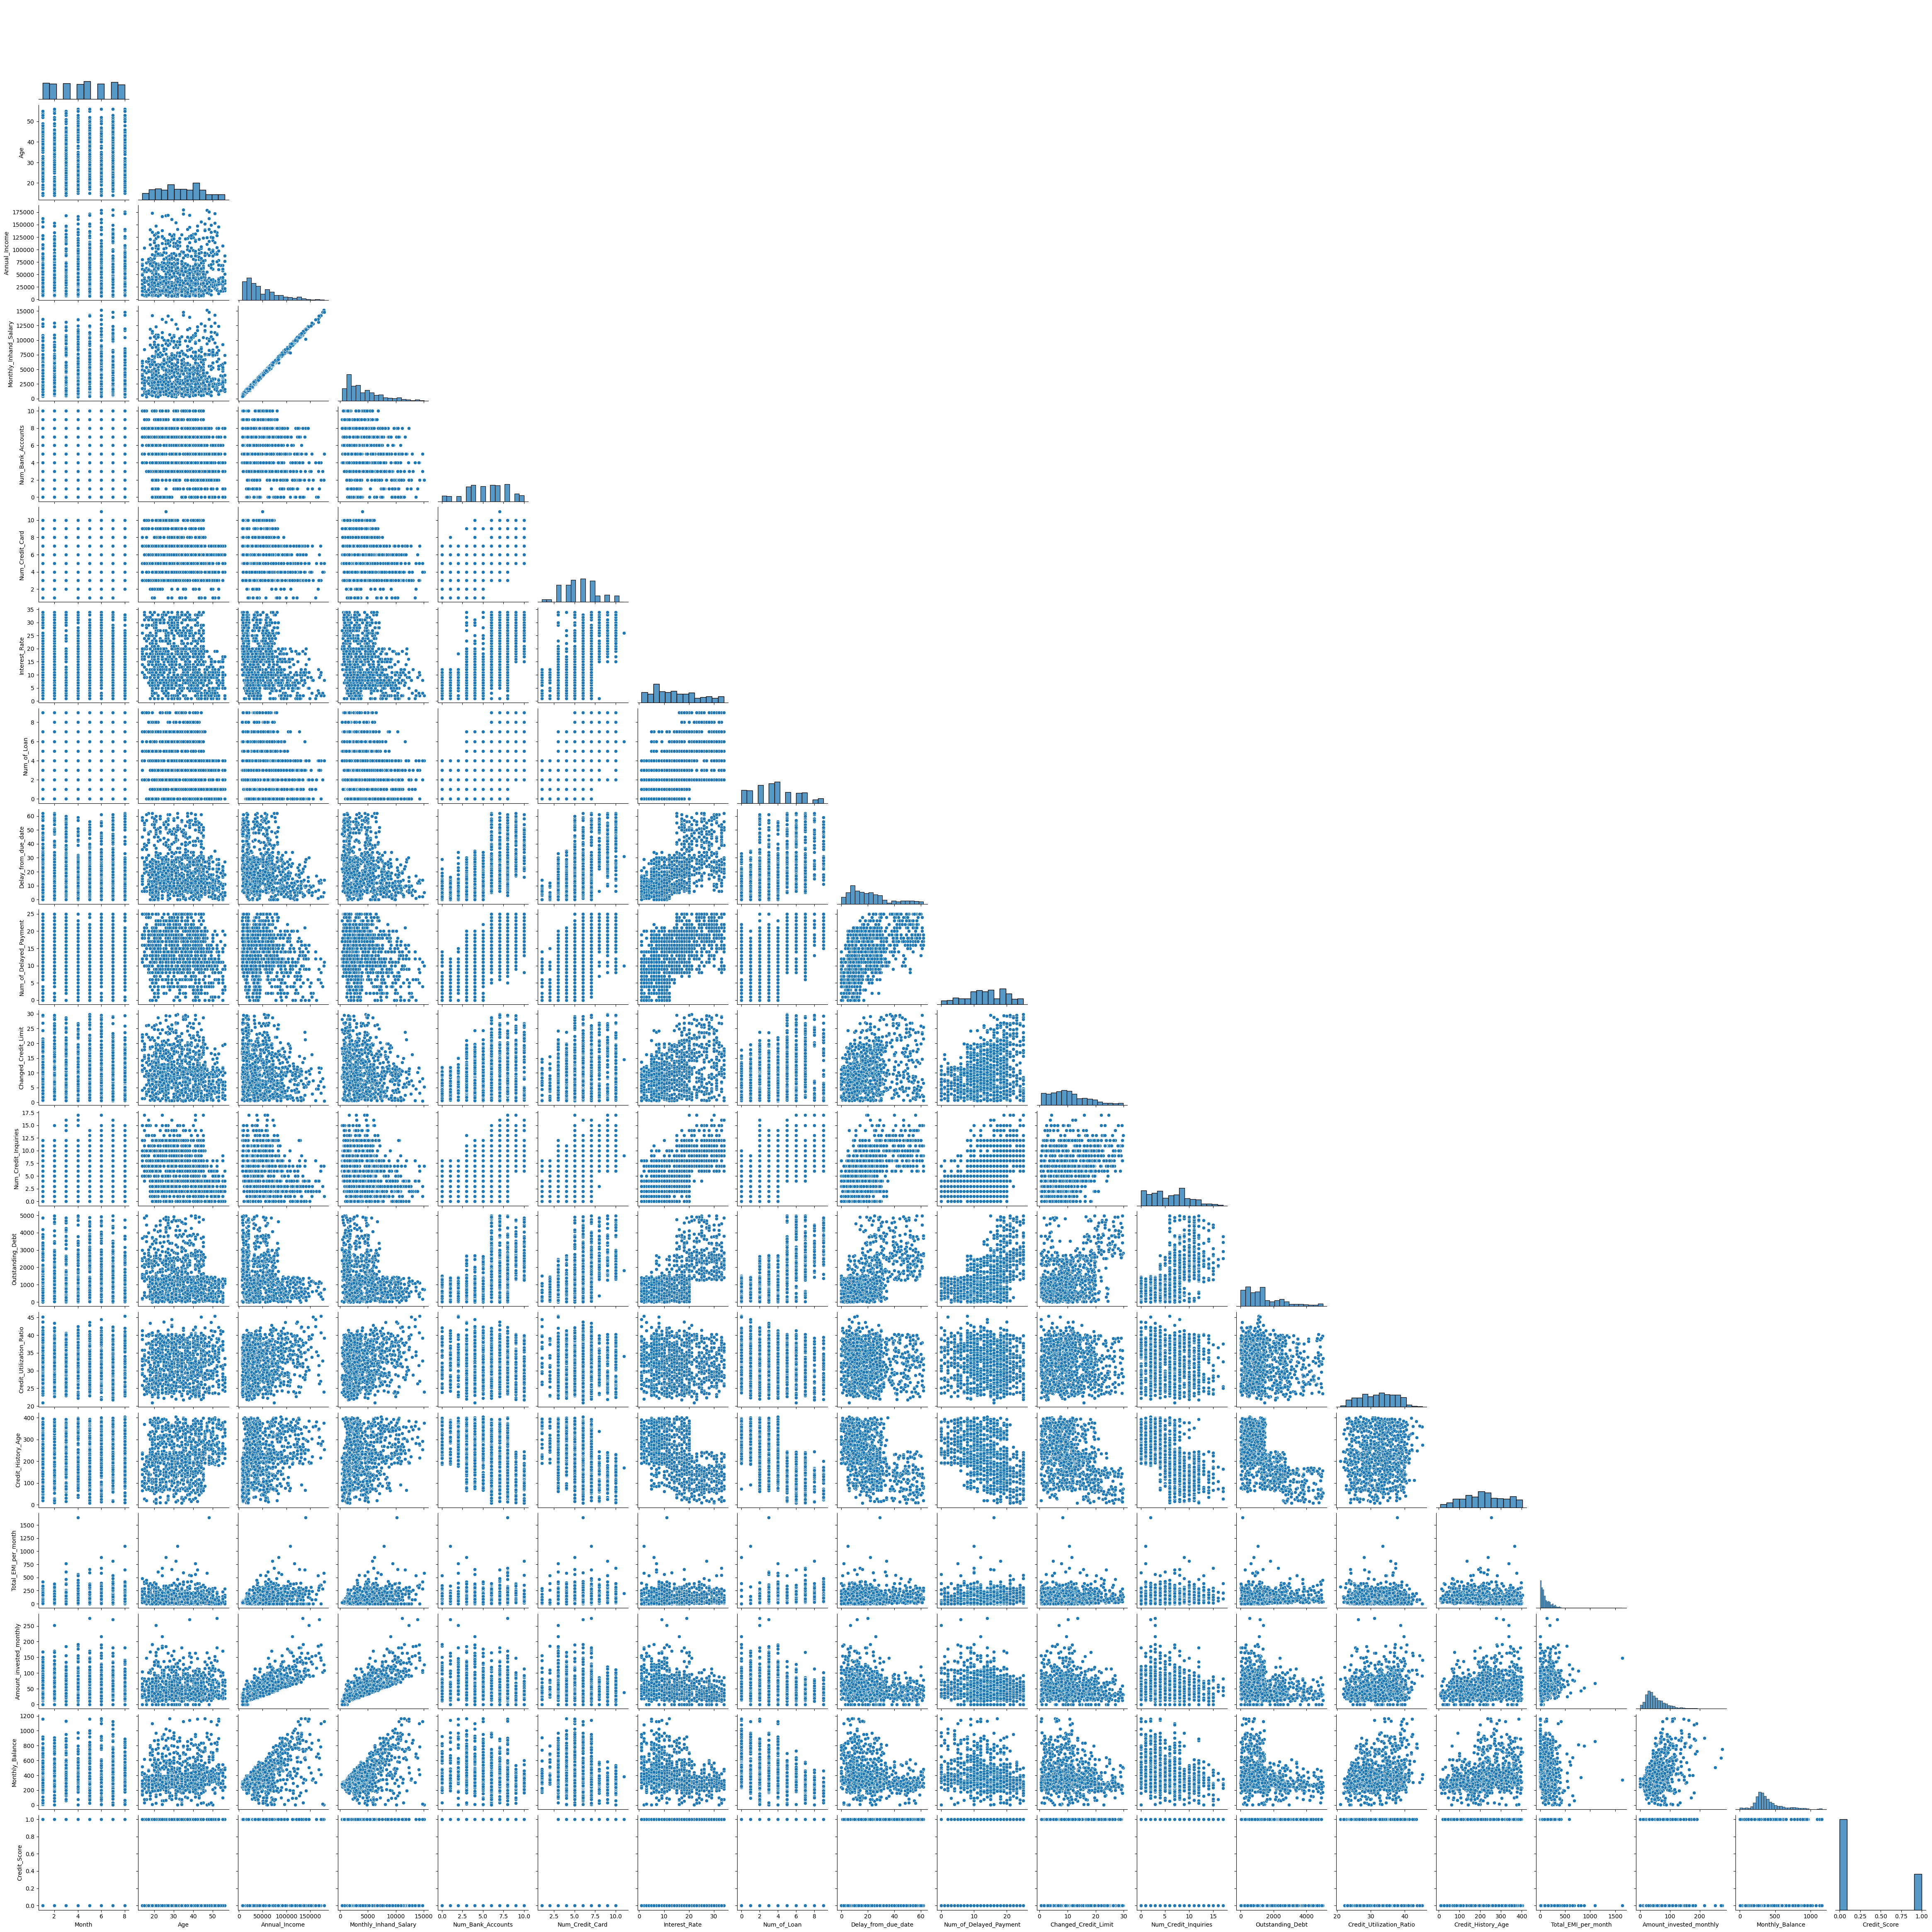

In [17]:
sns.pairplot(credit_df.sample(1000),corner=True);

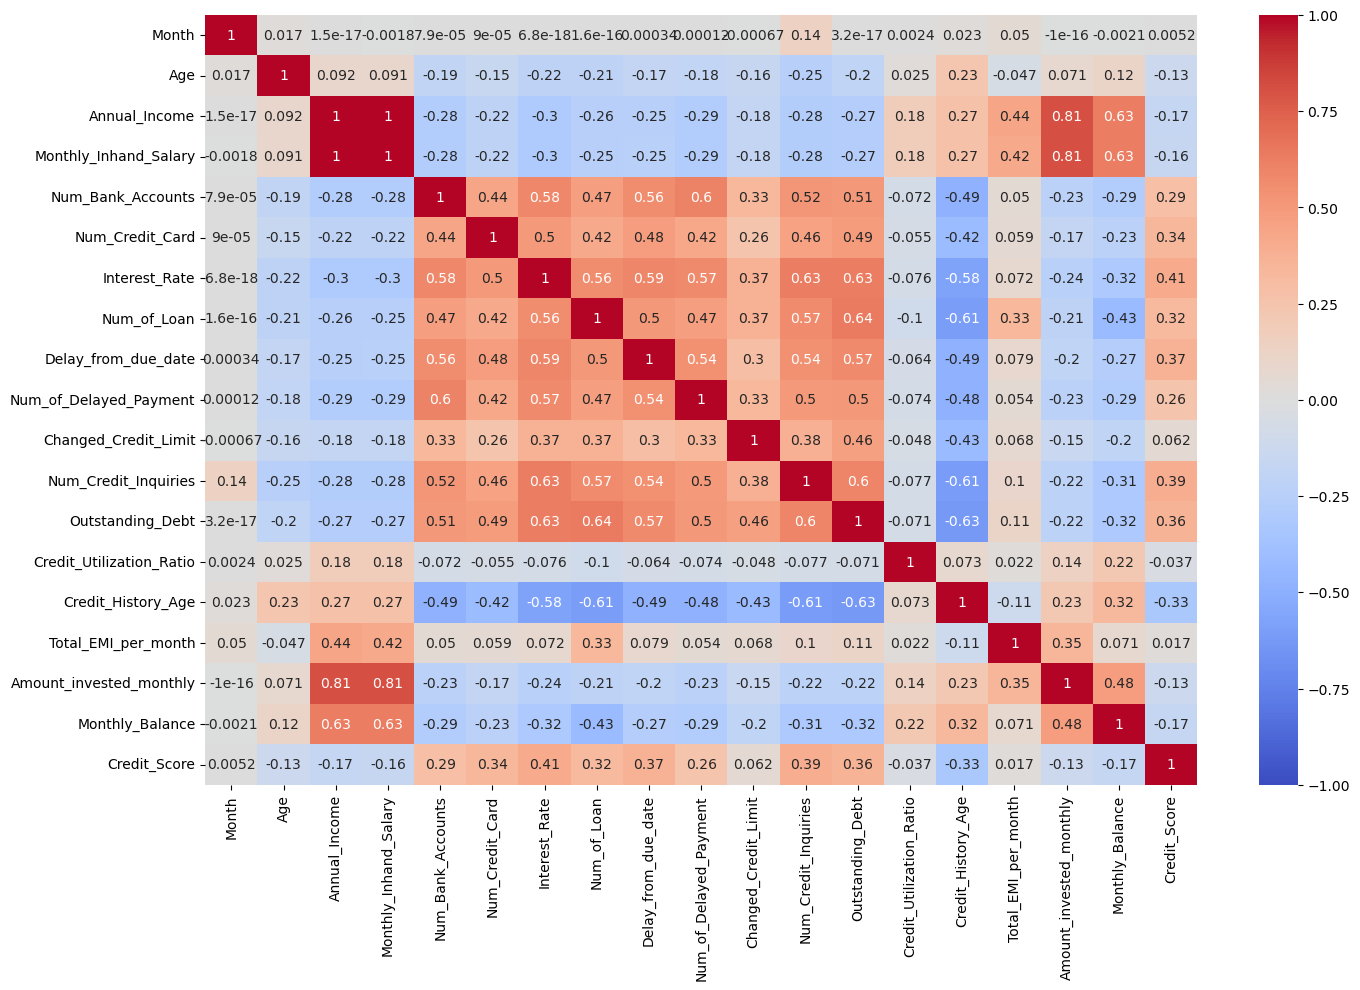

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(credit_df.corr(numeric_only=True),annot=True,cmap='coolwarm',vmax=1,vmin=-1);

In [77]:
credit_df.head(2)

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1  23.0  Scientist       19114.12            1824.843333   
1      2  23.0  Scientist       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.0              4.0            3.0          4.0   
1                3.0              4.0            3.0          4.0   

                                        Type_of_Loan  ...  Credit_Mix  \
0  auto loan,credit-builder loan,personal loan,ho...  ...        Good   
1  auto loan,credit-builder loan,personal loan,ho...  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                  26.82262               265.0   
1            809.98                  31.94496               266.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   

                 Payment_Behaviour Monthly_Balance  Credit_Score  
0  High_spent_Small_value_payments      312.494089             0  
1   Low_spent_Large_value_payments      284.629162             0  

[2 rows x 24 columns]

In [11]:
# Feature Engineering

cols_to_drop = ['Type_of_Loan','Occupation','Payment_Behaviour']
credit_eng = credit_df.drop(cols_to_drop,axis=1)

credit_eng = pd.get_dummies(credit_eng,drop_first=True) 

In [12]:
credit_eng.head(2)

Month   Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      1  23.0       19114.12            1824.843333                3.0   
1      2  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   

   Num_of_Delayed_Payment  ...  Credit_Utilization_Ratio  Credit_History_Age  \
0                     7.0  ...                  26.82262               265.0   
1                     4.0  ...                  31.94496               266.0   

   Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
0            49.574949                 21.46538       312.494089   
1            49.574949                 21.46538       284.629162   

   Credit_Score  Credit_Mix_Good  Credit_Mix_Standard  \
0             0             True                False   
1             0             True                False   

   Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  
0                      True                      False  
1                      True                      False  

[2 rows x 23 columns]

In [13]:
credit_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Month                      100000 non-null  int64  
 1   Age                        100000 non-null  float64
 2   Annual_Income              100000 non-null  float64
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  float64
 5   Num_Credit_Card            100000 non-null  float64
 6   Interest_Rate              100000 non-null  float64
 7   Num_of_Loan                100000 non-null  float64
 8   Delay_from_due_date        100000 non-null  float64
 9   Num_of_Delayed_Payment     100000 non-null  float64
 10  Changed_Credit_Limit       100000 non-null  float64
 11  Num_Credit_Inquiries       100000 non-null  float64
 12  Outstanding_Debt           100000 non-null  float64
 13  Credit_Utilization_Ratio   100

### Models to try 3 LogisticRegressionClassifier, RandomForestClassifier & GardientBoostedClassifier
### We will apply Standarization for LogisticRegression model



In [14]:
# Data Spliting
from sklearn.model_selection import train_test_split

X = credit_eng.drop('Credit_Score',axis=1)
y = credit_eng['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [23]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

# Fiting Model#1 LosgisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
#Default parameters
lr = LogisticRegression()
lr.fit(X_train_std,y_train)
print('Training :',lr.score(X_train_std,y_train))
print('Testing :',lr.score(X_test_std,y_test))

Training : 0.7899625
Testing : 0.7863


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train,lr.predict(X_train_std))


array([[51100,  5688],
       [11115, 12097]], dtype=int64)

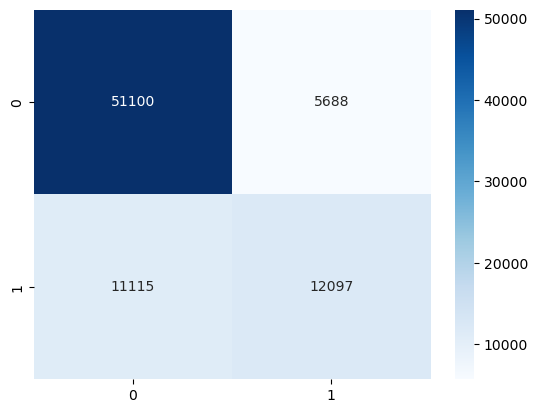

In [26]:
sns.heatmap(confusion_matrix(y_train,lr.predict(X_train_std)),cmap='Blues',annot=True,fmt='g');

#### Due to time we will try the other 2 models and see witch one performs better so we can move foward with Metrics

# Fiting Model#2 RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

print('Training :',rfc.score(X_train,y_train))
print('Testing :',rfc.score(X_test,y_test))

Training : 0.9999875
Testing : 0.8942


# Fiting Model#3 GardientBoostMachine

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

print('Training :',gbc.score(X_train,y_train))
print('Testing :',gbc.score(X_test,y_test))

Training : 0.8338125
Testing : 0.8289


# Metrics

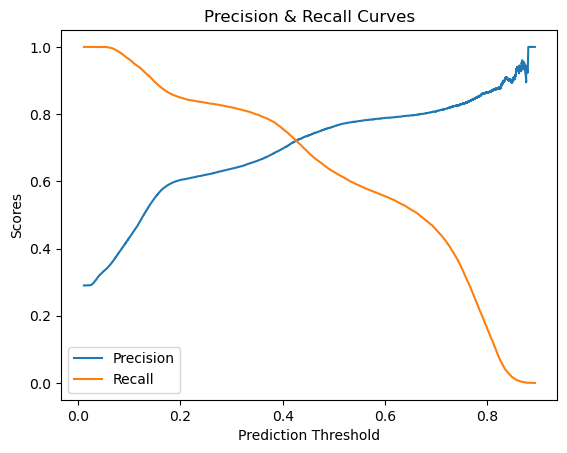

In [55]:
# precision_recall_curve 
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt 

p_curve, r_curve, t_curve = precision_recall_curve(y_train, gbc.predict_proba(X_train)[:,1]) 

plt.plot(t_curve, p_curve[:-1], label='Precision') 
plt.plot(t_curve, r_curve[:-1], label='Recall') 
plt.xlabel('Prediction Threshold') 
plt.ylabel('Scores') 
plt.legend() 
plt.title('Precision & Recall Curves') 
plt.show() 
# If Reacall line goes back UP means our probablities are innacurate 


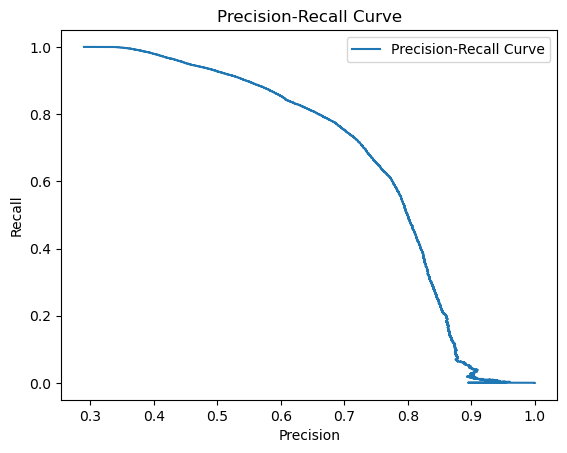

In [56]:
# Alternative we can see the F1 curve focus on the highes peak 


plt.plot(p_curve[:-1],r_curve[:-1], label='Precision-Recall Curve') 
plt.xlabel('Precision') 
plt.ylabel('Recall') 
plt.legend() 
plt.title('Precision-Recall Curve') 
plt.show() 


<Axes: >

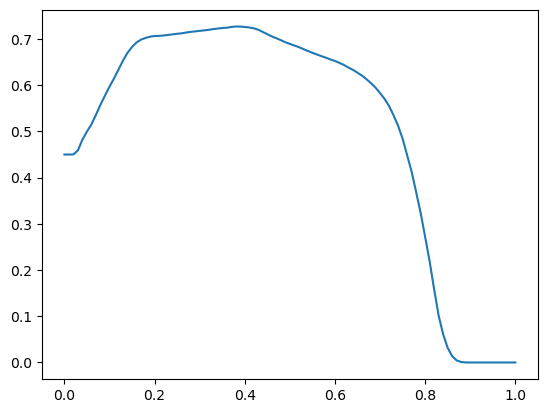

In [57]:
 #Best Threshold 
from sklearn.metrics import f1_score 

f1 = [] 

thresholds = np.linspace(0, 1, 101) 

for thresh in thresholds: 
	y_pred =(gbc.predict_proba(X_train)[:,1]>thresh) 
	f1.append(f1_score(y_train, y_pred)) 

sns.lineplot(x=thresholds, y=f1) 


In [58]:
thresh = thresholds[f1.index(max(f1))] 

thresh 

0.38

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Best threshold for LR = 0.31
print('LogisticRegression')
print('Accuracy: ',accuracy_score(y_test,lr.predict_proba(X_test_std)[:,1]>0.31))
print('Precision: ',precision_score(y_test,lr.predict_proba(X_test_std)[:,1]>0.31))
print('Recall: ', recall_score(y_test,lr.predict_proba(X_test_std)[:,1]>0.31))
print('F1: ', f1_score(y_test,lr.predict_proba(X_test_std)[:,1]>0.31))
print('')

#Best threshold for rfc wtih Hyperparameters = 0.39
print('RandomForest')
print('Accuracy: ',accuracy_score(y_test,rfc.predict_proba(X_test)[:,1]>0.39))
print('Precision: ',precision_score(y_test,rfc.predict_proba(X_test)[:,1]>0.39))
print('Recall: ', recall_score(y_test,rfc.predict_proba(X_test)[:,1]>0.39))
print('F1: ', f1_score(y_test,rfc.predict_proba(X_test)[:,1]>0.39))
print('')


#Best threshold for gbc wtih hyperparameters = 0.38
print('Gardient Boosted Machine')
print('Accuracy: ',accuracy_score(y_test,gbc.predict_proba(X_test)[:,1]>0.38))
print('Precision: ',precision_score(y_test,gbc.predict_proba(X_test)[:,1]>0.38))
print('Recall: ', recall_score(y_test,gbc.predict_proba(X_test)[:,1]>0.38))
print('F1: ', f1_score(y_test,gbc.predict_proba(X_test)[:,1]>0.51))
print('')

LogisticRegression
Accuracy:  0.7851
Precision:  0.6124546553808948
Recall:  0.7003110957483581
F1:  0.6534429930656346

RandomForest
Accuracy:  0.81805
Precision:  0.6434201736806947
Recall:  0.832353957829243
F1:  0.7257930826614423

Gardient Boosted Machine
Accuracy:  0.82165
Precision:  0.6668671980748985
Recall:  0.7663325267888006
F1:  0.6732007302776977



In [61]:
# ROC Curve 

from sklearn.metrics import roc_curve, auc 

# Predict probabilities for the positive class 
y_probs = gbc.predict_proba(X_train)[:, 1] 
#y_probs = rfc.predict_proba(X_train)[:, 1] 
#y_probs = gbc.predict_proba(X_train)[:, 1] 

# Calculate the ROC curve 
fpr, tpr, thresholds = roc_curve(y_train, y_probs) 

# Calculate the AUC (Area Under the Curve) 
auc_score = auc(fpr, tpr) 


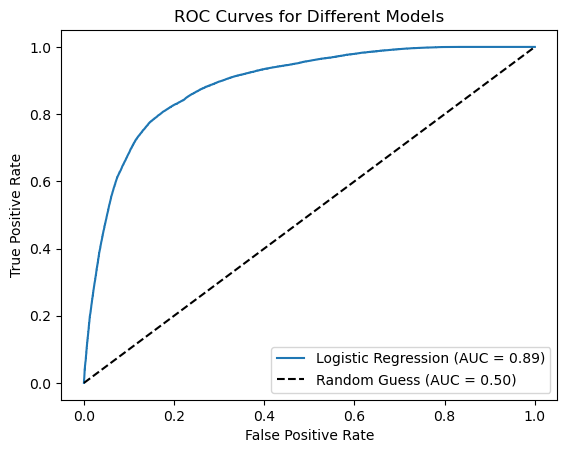

In [62]:

# Plot the ROC curve 
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})') 


# Draw Random Guess 
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)') 

# Modify Formatting 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curves for Different Models') 
plt.legend() 
plt.show()


In [36]:
## AUC LR = 0.82
## AUC rfc = 100 with Hyper parameters =0.91
## AUC gbc = 0.88 with Hyper parameters =0.89



# Turning Hyperparameters for 3 models 

In [ ]:
# Logistic Regression Hyperparameters 

from sklearn.model_selection import GridSearchCV 

parameters = { 
'C': [0.001,0.01,0.1,1,2,10,20], # the smaller the less complexity 
'penalty':['l1','l2','elasticnet'], 
'l1_ratio':[0,1,10]} 

GridSearch = GridSearchCV(LogisticRegression(solver='saga',max_iter=1000),parameters)
# class_weight=None ) 
GridSearch.fit(X_train_std,y_train) 
GridSearch.best_params_ 


In [ ]:
lr = LogisticRegression(C=10,penalty='l1',random_state=2023,max_iter=1000,n_jobs=-1,solver='saga')
lr.fit(X_train_std,y_train)

print('Training :',lr.score(X_train_std,y_train))
print('Testing :',lr.score(X_test_std,y_test))

In [ ]:
# Randomforest Hyperparameters

from sklearn.model_selection import RandomizedSearchCV
      
rfc = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False], # Should be off only for Tiny training sets
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

grid = RandomizedSearchCV(
    rfc, 
    params,
    n_iter=100,
    scoring="precision" #"accuracy","precision","recall","f1" 
)

grid.fit(X_train, y_train)

grid.best_params_

In [40]:
# Default Weight

rfc = RandomForestClassifier(
    random_state=2023, 
    n_jobs=-1,n_estimators=200,
    min_samples_leaf=5,
    max_samples=0.9,
    max_features=None,
    max_depth=10,
    bootstrap=True,
)

rfc.fit(X_train, y_train)

print('Training :',rfc.score(X_train,y_train))
print('Testing :',rfc.score(X_test,y_test))

Training : 0.8542875
Testing : 0.84485


In [70]:
# Balanced Weight

rfc = RandomForestClassifier(
    random_state=2023, 
    n_jobs=-1,n_estimators=200,
    min_samples_leaf=5,
    max_samples=0.9,
    max_features=None,
    max_depth=10,
    bootstrap=True,
    class_weight='balanced'
)

rfc.fit(X_train, y_train)

print('Training :',rfc.score(X_train,y_train))
print('Testing :',rfc.score(X_test,y_test))

Training : 0.8380875
Testing : 0.82835


In [71]:
# Intermediate weight

rfc = RandomForestClassifier(
    random_state=2023, 
    n_jobs=-1,n_estimators=200,
    min_samples_leaf=5,
    max_samples=0.9,
    max_features=None,
    max_depth=10,
    bootstrap=True,
    class_weight={1: 2,0:1}
)

rfc.fit(X_train, y_train)

print('Training :',rfc.score(X_train,y_train))
print('Testing :',rfc.score(X_test,y_test))


Training : 0.85005
Testing : 0.83825


In [52]:
from sklearn.model_selection import RandomizedSearchCV
      
gb = GradientBoostingClassifier(random_state=2023)

params = {
    'n_estimators': [20, 40, 60, 80, 100, 200],
    'learning_rate': [.01, .1],
    'max_features': ["sqrt"],
    'subsample': [.8, .9, .95],
    'max_depth': np.arange(start=3, stop=12, step=2),
    'min_samples_leaf': [2, 5, 10]    
}

grid = RandomizedSearchCV(
    gb, 
    params,
    n_iter=100,
    scoring="precision", #"accuracy","precision","recall","f1" 
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_

{'subsample': 0.95,
 'n_estimators': 60,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.01}

In [53]:
from sklearn.model_selection import GridSearchCV
      
gb = GradientBoostingClassifier(random_state=2023)

params = {
    'n_estimators': [60],
    'learning_rate': [.1],
    'max_features': ["sqrt"],
    'subsample': [0.90,0.95,1],
    'max_depth': [5],
    'min_samples_leaf': [10]    
}

grid = GridSearchCV(
    gb, 
    params,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 60,
 'subsample': 0.9}

In [73]:
# Default weight
gbc = GradientBoostingClassifier(
    random_state=2023,
    n_estimators=60,
    learning_rate=0.1,
    max_features='sqrt',
    subsample=0.9,
    max_depth=5,
    min_samples_leaf=10
    )

gbc.fit(X_train,y_train)

print('Training :',gbc.score(X_train,y_train))
print('Testing :',gbc.score(X_test,y_test))

Training : 0.8356
Testing : 0.8296


In [ ]:
# Checking imnbalance Data

In [63]:
y.value_counts()

Credit_Score
0    71002
1    28998
Name: count, dtype: int64

In [64]:
#Oversampling
import imblearn.over_sampling as OS

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 4x as many positive samples
ratio = {1 : n_pos * 4, 0 : n_neg}

# randomly oversample positives
ROS = OS.RandomOverSampler(
    sampling_strategy = ratio, 
    random_state=2023
)

X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

print(f"Original Positive Class Count: {np.sum(y_train)}")
print(f"Oversample Positive Class Count: {np.sum(y_train_rs)}")

#Then refit Model using X_train_rs, y_train_rs  then you can use test data sets for the metrics

Original Positive Class Count: 23212
Oversample Positive Class Count: 92848


In [67]:
#SMOTE (Synthetic Minority Oversampling Technique) only for KNN Models

#Less prone for overfitting

import imblearn.over_sampling as OS

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 4x as many positive samples
ratio = {1 : n_pos * 4, 0 : n_neg}

# randomly oversample positives
ROS = OS.SMOTE(
    sampling_strategy = 'auto', #'auto'
    random_state=2023
)

X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

print(f"Original Positive Class Count: {np.sum(y_train)}")
print(f"Oversample Positive Class Count: {np.sum(y_train_rs)}")

#Then refit Model using X_train_rs, y_train_rs  then you can use test data sets for the metrics

Original Positive Class Count: 23212
Oversample Positive Class Count: 56788


In [69]:

#Under sampling

# Cons: Drops the rows that helped improve model fit 
# This is best for large Datasets that can afford lose rows

import imblearn.under_sampling as US 

# Define Minority class %
minority_pct = 0.30 #{1:n_pos,0:n_neg/10} # 0.01

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = 1 / 2,
                   random_state=2023
)

X_train_rs, y_train_rs = RUS.fit_resample(X_train, y_train)

print(f"Original Positive Class Count: {np.mean(y_train)}")
print(f"Oversample Positive Class Count: {np.mean(y_train_rs)}")

#Then refit Model using X_train_rs, y_train_rs  then you can use test data sets for the metrics

Original Positive Class Count: 0.29015
Oversample Positive Class Count: 0.3333333333333333


In [15]:
# best model apper to be RandomForest with hyperparameters, default weight

# Default Weight

rfc = RandomForestClassifier(
    random_state=2023, 
    n_jobs=-1,n_estimators=200,
    min_samples_leaf=5,
    max_samples=0.9,
    max_features=None,
    max_depth=10,
    bootstrap=True,
)

rfc.fit(X_train, y_train)

print('Training :',rfc.score(X_train,y_train))
print('Testing :',rfc.score(X_test,y_test))

Training : 0.8547125
Testing : 0.84495


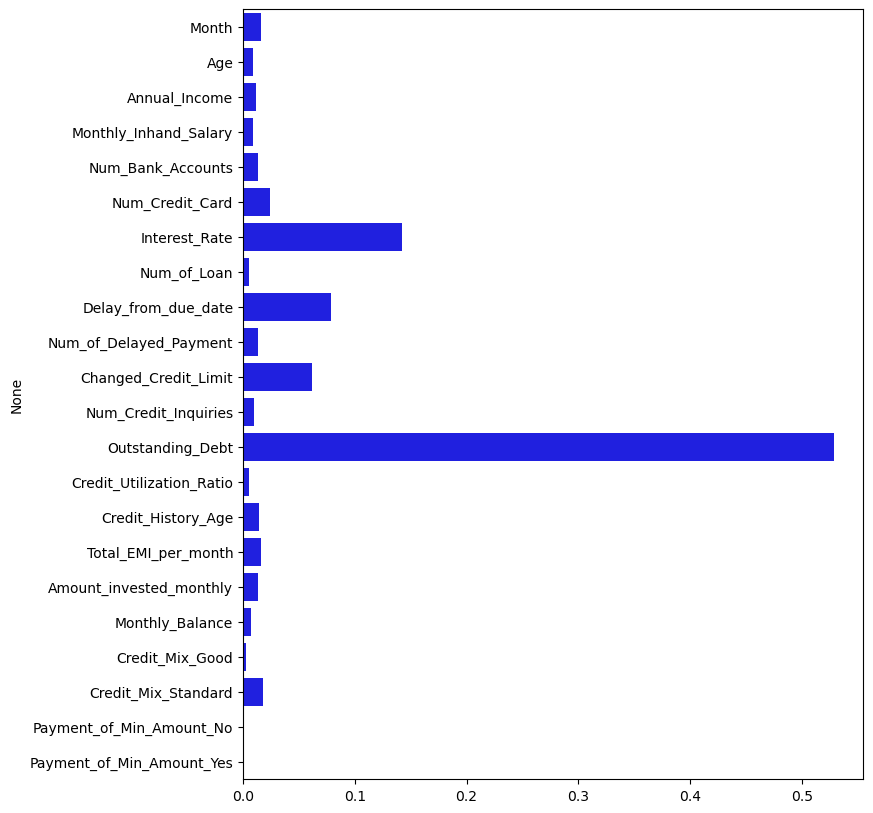

In [83]:
# If Feature very close to 0 it's better to remove it 
plt.figure(figsize=(8,10))
sns.barplot(x=rfc.feature_importances_,y=X.columns, color='blue');

In [105]:
import shap
import matplotlib.pyplot as plt

# Convert bool to int (this part is fine)
for col in X_test.select_dtypes("bool"):
    X_test[col] = X_test[col].astype("int")

import shap

explainer = shap.Explainer(rfc) # Model

shap_values = explainer(X_test.sample(50, random_state=12345).iloc[1])

In [101]:
X_test.sample(50, random_state=12345).iloc[1]

Month                            8.000000
Age                             26.000000
Annual_Income                21673.570000
Monthly_Inhand_Salary         1623.130833
Num_Bank_Accounts                7.000000
Num_Credit_Card                  3.000000
Interest_Rate                   16.000000
Num_of_Loan                      1.000000
Delay_from_due_date             10.000000
Num_of_Delayed_Payment          15.000000
Changed_Credit_Limit             9.660000
Num_Credit_Inquiries             3.000000
Outstanding_Debt               551.810000
Credit_Utilization_Ratio        36.138350
Credit_History_Age             252.000000
Total_EMI_per_month             14.539651
Amount_invested_monthly         45.583100
Monthly_Balance                301.338146
Credit_Mix_Good                  0.000000
Credit_Mix_Standard              1.000000
Payment_of_Min_Amount_No         1.000000
Payment_of_Min_Amount_Yes        0.000000
Name: 31151, dtype: float64

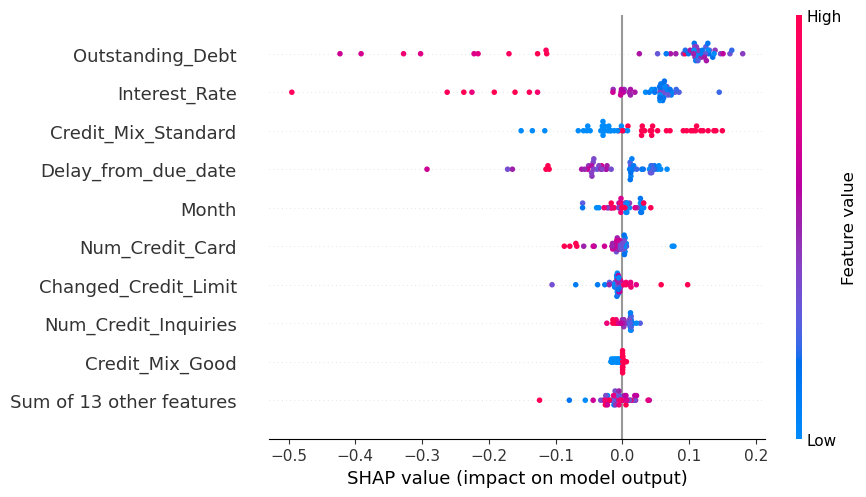

In [108]:
import shap
import matplotlib.pyplot as plt

# Convert boolean columns to integers
for col in X_test.select_dtypes("bool"):
    X_test[col] = X_test[col].astype("int")

# Create the SHAP explainer
explainer = shap.Explainer(rfc)

# Get SHAP values correctly
shap_values = explainer(X_test.sample(50, random_state=12345))  

# If it's a multi-class model, shap_values will be 3D, so select a class (e.g., class 0)
if len(shap_values.shape) == 3:  
    shap_values = shap_values[:, :, 0]  # Change 0 to another class index if needed

# Plot the beeswarm
shap.plots.beeswarm(shap_values)


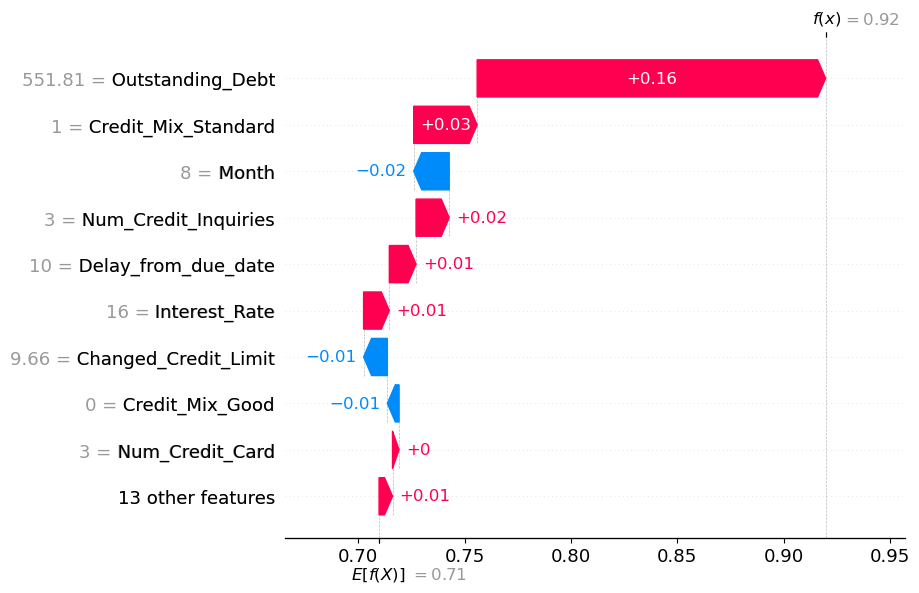

In [109]:
shap.plots.waterfall(shap_values[1])

##### These are the parameters we were looking to flag Credit_Score = "Poor", 
##### in other words with a 92%  probability model predicts this person falls in the poor category correctly :) 


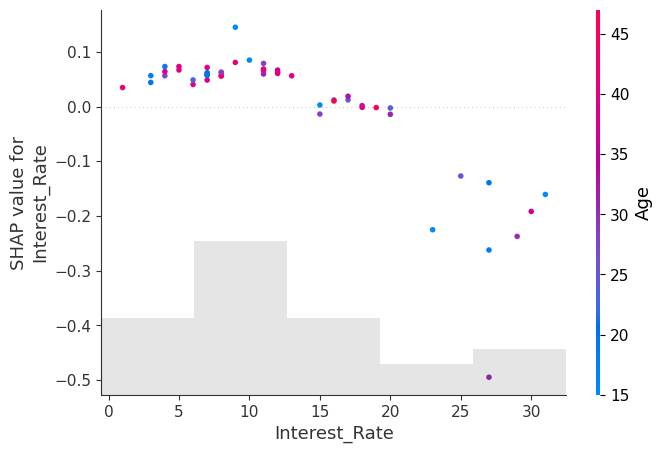

In [113]:
shap.plots.scatter(
    shap_values[:, 6], # plot income in X
    color=shap_values[:, 1] # color by age
)

# We can move to pipeline deployment

In [28]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import dash_bootstrap_components as dbc
import pandas as pd
import joblib
import numpy as np

# Load the trained model pipeline
model_pipeline = joblib.load("credit_model_pipeline.pkl")

# Setup Dash app
app = dash.Dash(__name__)
app.title = 'Creditworthiness Prediction'
server = app.server

# App Layout 
app.layout = html.Div([
    dbc.Row([html.H3(children='Predict Credit Score (Poor or Not)')]),
    
    # Age Slider
    dbc.Row([
        dbc.Col(html.Label(children='Age:'), width={"order": "first"}),
        dbc.Col(dcc.Slider(min=18, max=100, value=30, id='age', marks={i: str(i) for i in range(18, 101, 10)})) 
    ]),
    
    # Salary Slider
    dbc.Row([
        dbc.Col(html.Label(children='Estimated Salary'), width={"order": "first"}),
        dbc.Col(dcc.Slider(min=0, max=500000, value=50000, id='salary', marks={i: str(i) for i in range(0, 500001, 50000)})) 
    ]),
    
    # Gender Radio Items
    dbc.Row([
        dbc.Col(html.Label(children='Gender'), width={"order": "first"}),
        dbc.Col(dcc.RadioItems(options=[{"label": "Male", "value": "Male"}, {"label": "Female", "value": "Female"}], value="Male", id='Gender'))
    ]),
    
    # Submit Button
    dbc.Row([dbc.Button('Submit', id='submit-val', n_clicks=0, color="primary")]),
    
    # Output prediction
    html.Br(),
    dbc.Row([html.Div(id='prediction output')])
    
], style={'padding': '0px 0px 0px 150px', 'width': '50%'})

# Callback to produce the model output when the button is clicked
@app.callback(
    Output('prediction output', 'children'),
    Input('submit-val', 'n_clicks'),
    State('age', 'value'),
    State('salary', 'value'),
    State('Gender', 'value')
)
def update_output(n_clicks, age, salary, gender):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        "Age": [float(age)], 
        "EstimatedSalary": [float(salary)], 
        "Gender": [gender]
    })
    
    # Ensure the input data has all the required columns from the training set
    required_columns = model_pipeline.named_steps['prep'].transformers_[0][2] + model_pipeline.named_steps['prep'].transformers_[1][2]  # Get all the original feature names
    
    for col in required_columns:
        if col not in input_data.columns:
            input_data[col] = np.nan  # or 0, depending on what makes sense for your model
    
    # Predict with the trained model pipeline
    prediction = model_pipeline.predict_proba(input_data)[0]
    
    # Output the probability of the customer being flagged as "Poor"
    output = f'This customer has a credit score probability of being Poor: {round(prediction[1], 2)}'
    
    return output

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=8050, host='127.0.0.1')
